<a href="https://colab.research.google.com/github/DeshanSamarathunga2001/Regression_with_TensorFlow/blob/main/Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [34]:
import pandas as pd             #work with data
import matplotlib.pyplot as plt #Data visulaization
import tensorflow as tf        #Build the neural network
import opendatasets as od      #Download kaggle dataset

In [7]:
#download dataset
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: samarathunga2001
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 15.3MB/s]

In [8]:
data = pd.read_csv("/content/random-linear-regression/test.csv")

In [9]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [10]:
data.shape

(300, 2)

In [11]:
x = data['x']
y = data['y']

In [12]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [13]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


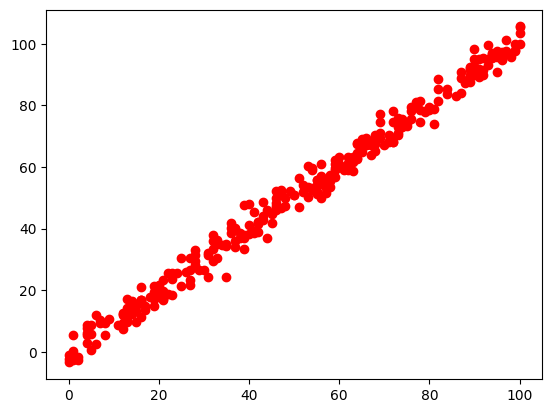

In [14]:
#Visualize the data
plt.scatter(x,y, c='r')
plt.show()

In [15]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=42)

In [16]:
x_train.shape , x_test.shape

((240,), (60,))

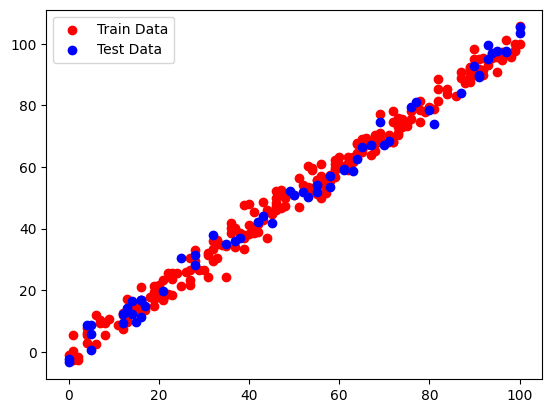

In [17]:
plt.scatter(x_train, y_train, c='r' ,label = 'Train Data')
plt.scatter(x_test, y_test, c='b' ,label = 'Test Data')
plt.legend()
plt.show()

# **Model Building**

In [79]:
#Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[1]),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

#complie model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
              metrics = ['mae']
              )

#train model
epoch_number = 100
history=model.fit(tf.expand_dims(x_train,axis=1), y_train, epochs=epoch_number)
#methana "tf.expand_dims(x_train,axis=1)" dunne train karann dena data 2d widiyata denn aona nisa

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 90.4102 - mae: 90.4102  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.6449 - mae: 15.6449  
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2581 - mae: 9.2581 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8439 - mae: 5.8439 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5917 - mae: 2.5917 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0842 - mae: 3.0842 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2604 - mae: 4.2604 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4053 - mae: 3.4053 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9251 - mae: 3.9251 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9281 - mae: 3.9281 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8419 - mae: 2.8419 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5978 - mae: 3.5978 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

In [70]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

In [71]:
y_prediction = model.predict(x_test)
y_prediction[:5]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[91.2334  ],
       [77.00103 ],
       [95.299805],
       [ 4.822515],
       [92.249985]], dtype=float32)

In [72]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


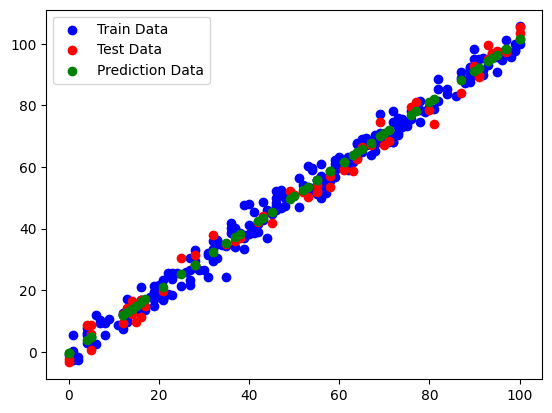

In [73]:
plt.scatter(x_train,y_train, c='b',label='Train Data')
plt.scatter(x_test,y_test, c='r',label='Test Data')
plt.scatter(x_test,y_prediction, c='g',label='Prediction Data')
plt.legend()
plt.show()

In [74]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5712 - mae: 2.5712 


[2.554478883743286, 2.554478883743286]

In [75]:
# Using MAE from losses module
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_prediction))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=2.5544791221618652>

In [77]:
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_prediction))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.461766242980957>

In [81]:
history.history

{'loss': [66.89270782470703,
  14.601572036743164,
  9.821171760559082,
  4.980714321136475,
  2.753697633743286,
  3.3639798164367676,
  4.249917984008789,
  3.0667879581451416,
  4.109423637390137,
  3.6231133937835693,
  2.76640248298645,
  3.823624610900879,
  3.7050862312316895,
  5.0358123779296875,
  8.045367240905762,
  7.656781196594238,
  3.9200663566589355,
  3.6373040676116943,
  3.5415916442871094,
  3.2304317951202393,
  3.2612297534942627,
  3.8833987712860107,
  5.332014083862305,
  4.922825813293457,
  4.494446754455566,
  3.5302364826202393,
  5.392877101898193,
  4.889591693878174,
  4.945405006408691,
  4.140847682952881,
  3.4760141372680664,
  2.7819223403930664,
  2.944902181625366,
  3.034311532974243,
  2.9077961444854736,
  2.686546802520752,
  3.0252432823181152,
  3.6481282711029053,
  3.1760456562042236,
  2.583153486251831,
  3.6751503944396973,
  3.1503937244415283,
  2.861393928527832,
  3.2053959369659424,
  3.6777796745300293,
  3.3259634971618652,
  2

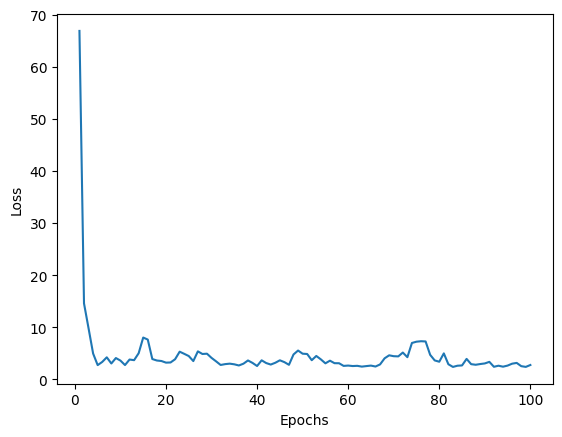

In [80]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [82]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f".\nWeights:\n{weights} \nBiases:\n {biases}")

.
Weights:
[[ 1.5146038e-03 -2.3737388e-02  6.1726976e-02 -7.8840787e-03
   2.0994393e-03  1.9660003e-03 -1.6824136e-03 -2.5997350e-03
   3.2353108e-03  1.1461013e-03 -3.1271856e-04  3.5952586e-03
  -2.1843291e-03 -4.3480635e-02 -3.7226520e-02  2.6732707e-01
  -3.7946505e-03 -7.3140468e-03 -4.4103749e-03 -2.8383147e-03
  -8.1822468e-04 -1.3139576e-03 -3.7355474e-03 -2.4235523e-03
  -4.5746802e-03 -9.2868018e-04 -1.0404576e-04  6.4668641e-03
   3.3993225e-03 -1.7596335e-03 -2.6562152e-04  1.5890168e-03
   9.6540518e-02 -1.0181637e-03  2.3559837e-03  8.7908329e-03
  -4.7028661e-02 -2.6763761e-01 -2.9595670e-01 -1.8155728e-03
   1.3053465e-03  8.0590220e-03  1.1195833e-03 -3.4947164e-04
   1.7726520e-01  4.7606435e-03 -1.4162643e-02  2.2501426e-03
  -3.3700016e-01 -4.3259048e-01  5.7825867e-02  3.7674620e-04
  -3.0929752e-04 -6.1237840e-03 -5.4372828e-03 -5.5899017e-04
   2.9362205e-03  3.1292447e-04  5.7004611e-03 -2.2615683e-01
  -5.4867207e-03  8.6095901e-03 -2.5368689e-03 -4.0484737e-